# Define $\phi_\pi$ acceptance correction based on SIDIS data from run 6420

last edit Apr-28, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;

%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# (1) Load SIDIS data from run 6420

In [2]:
load_SIDIS_data( Nruns = 1 )

Run number  6420 (1/1 runs)
Loaded 644481 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 274142 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Done loading files.


### (1.1) Apply selection cuts not previously imposed

In [3]:
e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts = apply_further_selection_cuts_to_data(fdebug=2)

(e,e piplus )
644481 events before cut
442203 events after p-theta cut (68.6 %)
398666 events after M_X cut (61.9 %)
(e,e piminus )
274142 events before cut
265675 events after p-theta cut (96.9 %)
245408 events after M_X cut (89.5 %)


# (2) Compute the acceptance correction as a function of $\phi$

In [4]:
acc_corr_filename = '/Users/erezcohen/Desktop/data/BAND/AcceptanceCorrection/PhiPlateauHeightAcceptanceCorrection.csv'
acc_correction_df = pd.read_csv(acc_corr_filename)

AccCorrecHeight['piplus']     = acc_correction_df['Height-Correction piplus'][0]
AccCorrecHeight_err['piplus'] = acc_correction_df['Height-Correction err piplus'][0]
AccCorrecHeight['piminus']    = acc_correction_df['Height-Correction piminus'][0]
AccCorrecHeight_err['piminus']= acc_correction_df['Height-Correction err piminus'][0]
AccCorrecHeight

{'piplus': 3.0783306746256374, 'piminus': 3.0783306746256374}

fraction of bad phi:
{'piplus': 0.3333333333333333, 'piminus': 0.35555555555555557}


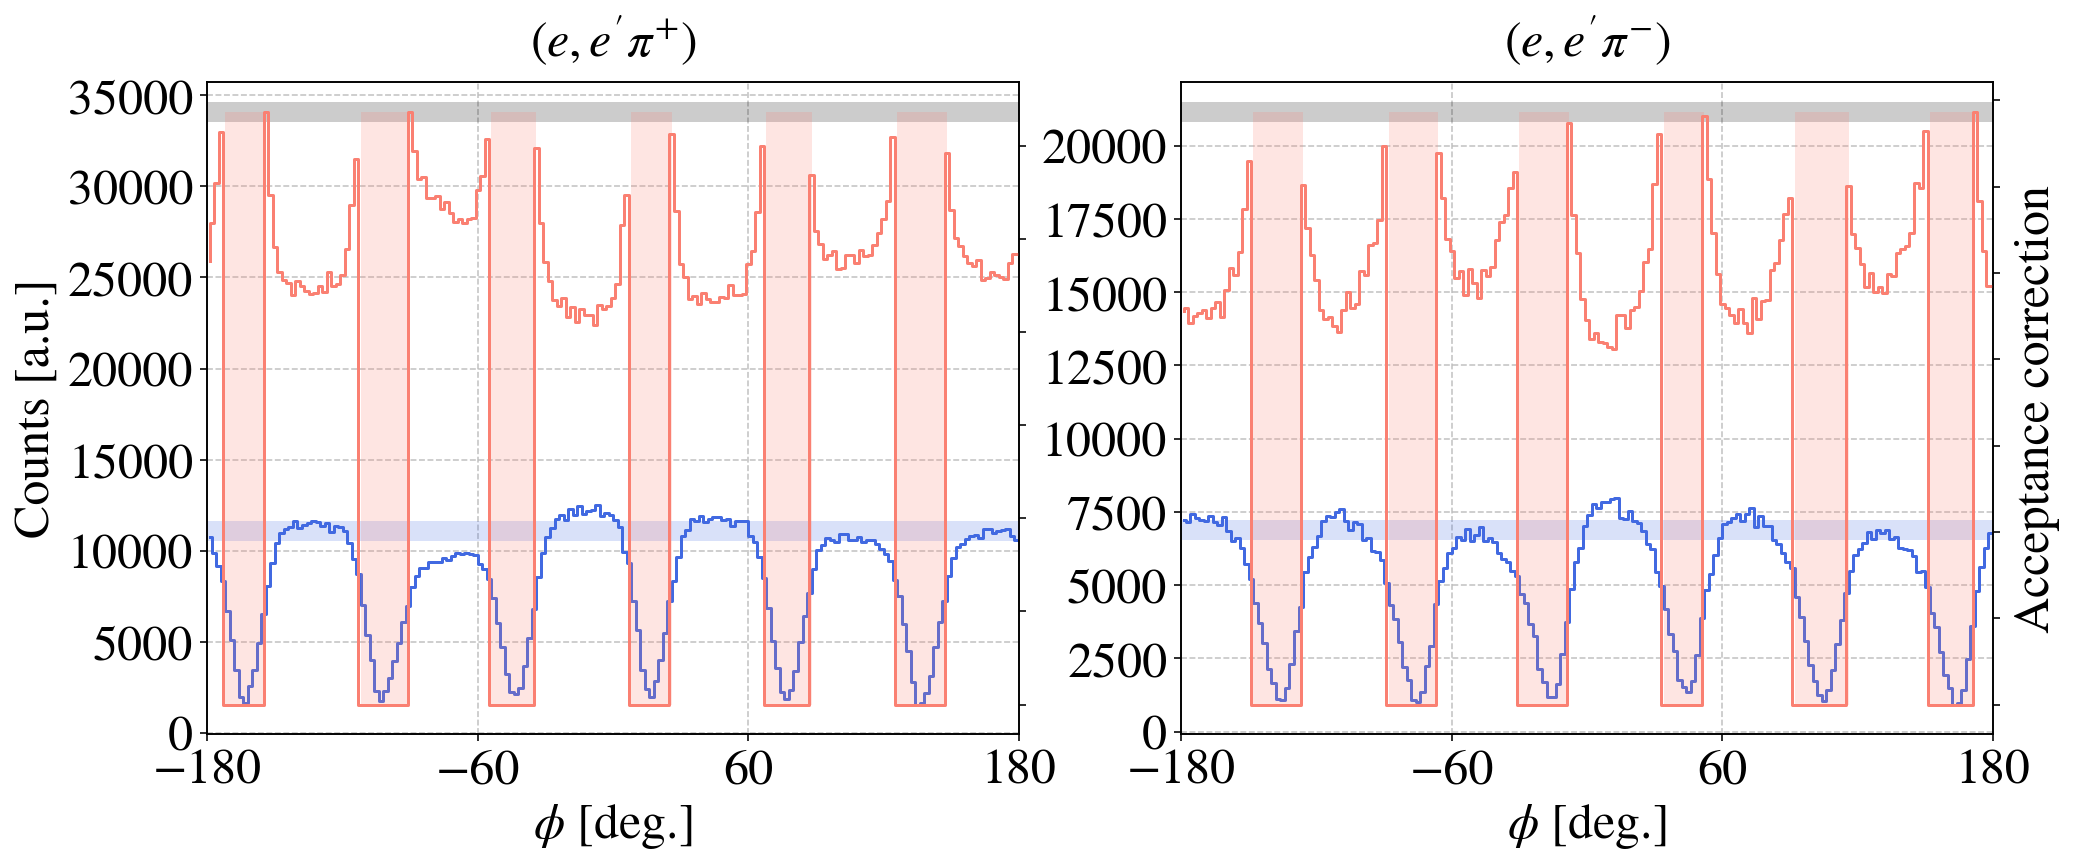

In [17]:
ComputeAcceptanceCorrectionFromRun6420()
print('fraction of bad phi:')
print(fraction_bad_phi)

### Validate: does the correction applied on run 6420 really flatten it? 

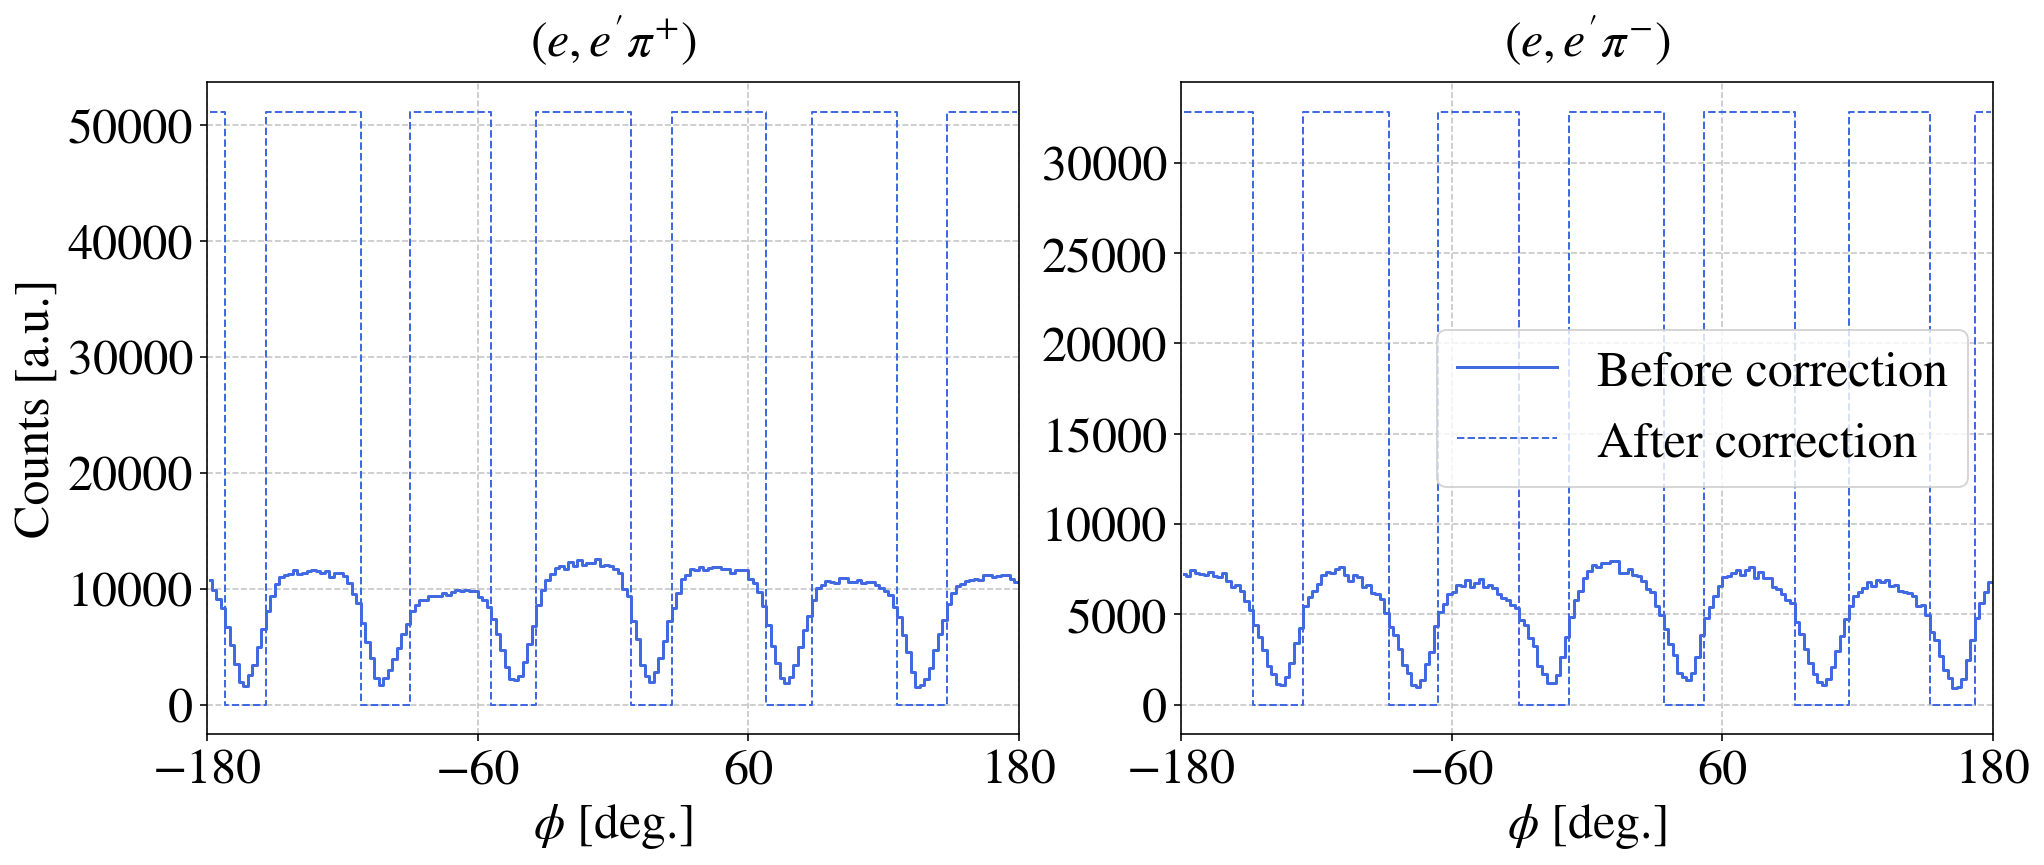

In [18]:
fig = plt.figure(figsize=(16,6));
    
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)

    df  = e_e_pi_pass_cuts[pi_ch];
    for run,color in zip([6420],['royalblue']):
        df_run = df[df.runnum==run]
        phi_run = np.array(df_run.pi_Phi)*r2d   
        
        # first plot - data with no acceptance correction
        x,histo,x_err,histo_err = plot_step_hist( x_arr=phi_run,  bins=phi_bins , label='Before correction', 
                                                   color=color,                    
                                                   do_plot_errorbar=False, density=False, linewidth=3)
        h['data-%d'%run]     = histo
        h_err['data-%d'%run] = histo_err
        # second plot - data from run 6421 with acceptance correction computed from run 6420
        h['data-%d corrected'%run]     = h['data-%d'%run] * AccCorrec[pi_ch];
        h_err['data-%d corrected'%run] = h_err['data-%d'%run] * AccCorrec[pi_ch];
        plt.step( phi_centers, h['data-%d corrected'%run] , '--', where='mid',
                 color=color, linewidth=1, label='After correction')


    # cosmetics
    set_axes(ax, '$\phi$ [deg.]', 'Counts [a.u.]' if pi_idx==1 else '',
                 title="$(e,e'"+pi_label+')$',
                 do_add_grid=True,
                 remove_ticks_y=False,
                 do_add_legend=True if pi_idx==2 else False,
                 xlim=phi_xlim,
                 xticks=phi_xticks)   

# (3) Check acceptance correction on other runs 6421,6422,6426 - $\phi_\pi$ distribution

In [19]:
load_SIDIS_data( Nruns = 2 )

Run number  6420 (1/2 runs)
Loaded 644481 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 274142 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Run number  6421 (2/2 runs)
Loaded 632087 (e,e piplus ) events and  35 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 272140 (e,e piminus ) events and  12 (e,e piminus n), events
retained 9 (e,e piminus n), events with Pn > 275 MeV/c
Done loading files.


In [20]:
e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts = apply_further_selection_cuts_to_data(fdebug=2)

(e,e piplus )
1276568 events before cut
1747520 events after p-theta cut (136.9 %)
1597321 events after M_X cut (125.1 %)
(e,e piminus )
546282 events before cut
1056857 events after p-theta cut (193.5 %)
977284 events after M_X cut (178.9 %)


### Show data from runs 6420 and 6421 on the same axes frame

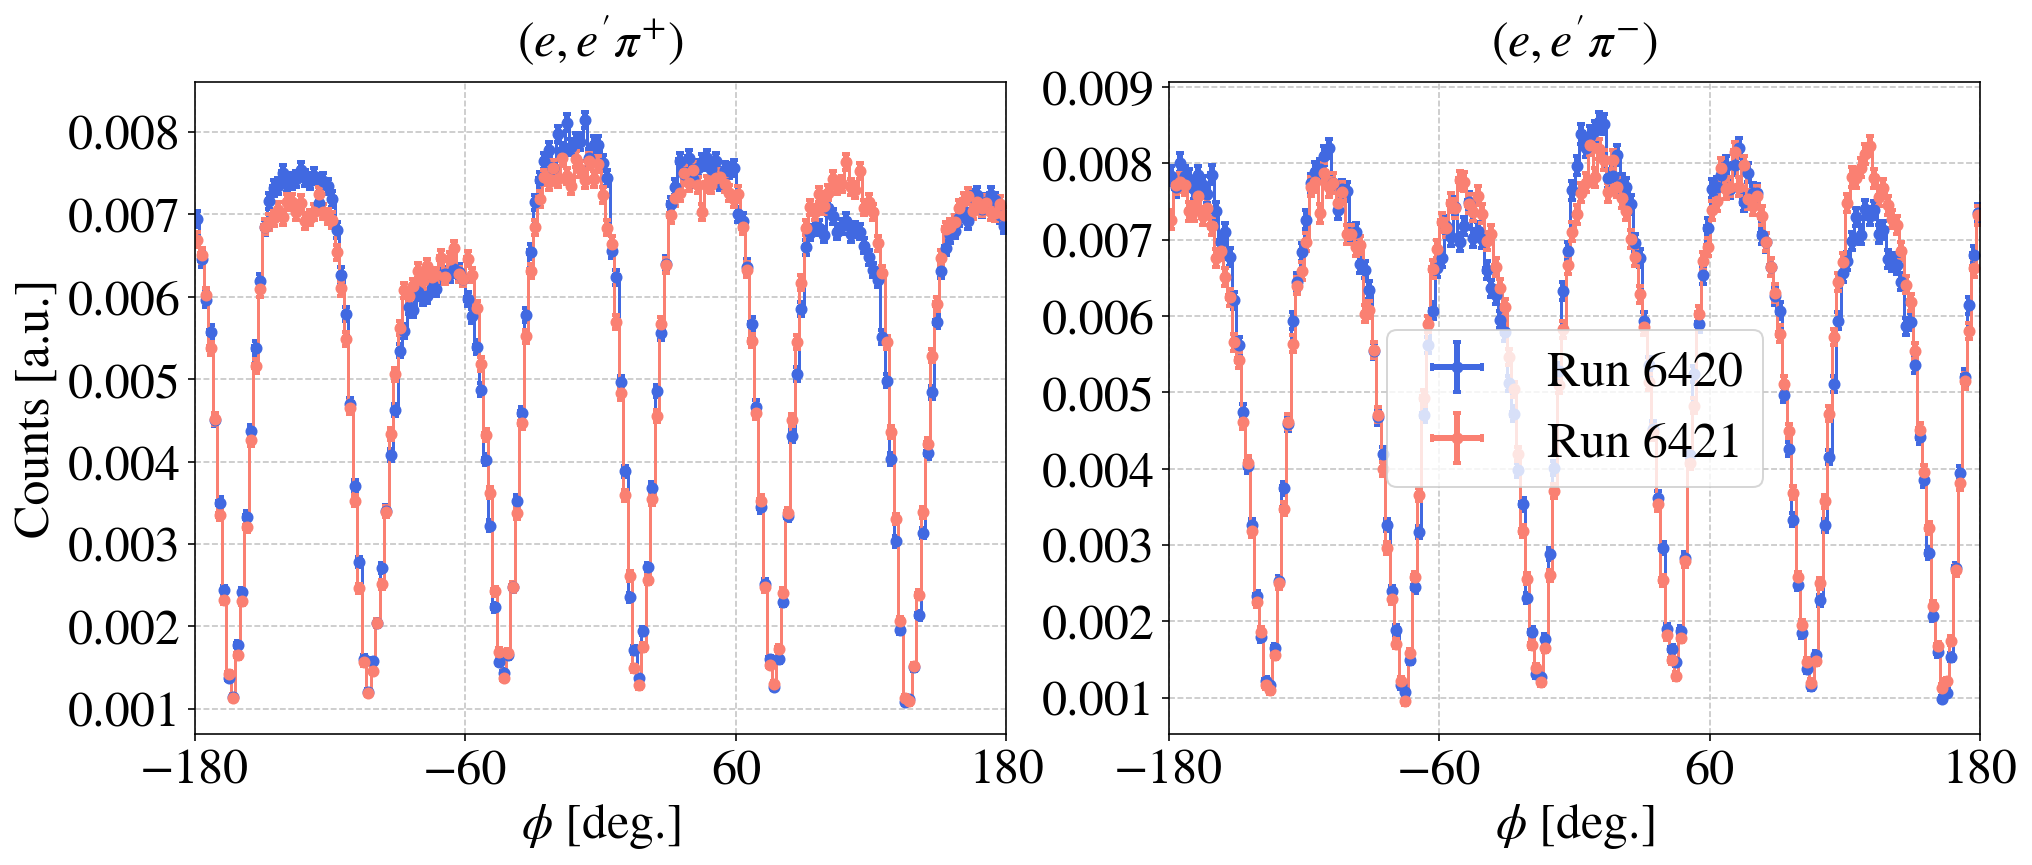

In [21]:
fig = plt.figure(figsize=(16,6));
    
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)

    df  = e_e_pi_pass_cuts[pi_ch];
    df6420 = df[df.runnum==6420]
    phi6420 = np.array(df6420.pi_Phi)*r2d
    df6421 = df[df.runnum==6421]
    phi6421 = np.array(df6421.pi_Phi)*r2d
    
    plot_step_hist( x_arr=phi6420,  bins=phi_bins , label='Run 6420', 
                                               color='royalblue',                    
                                               do_plot_errorbar=True, density=True, linewidth=3)
    plot_step_hist( x_arr=phi6421,  bins=phi_bins , label='Run 6421', 
                                               color='salmon',                    
                                               do_plot_errorbar=True, density=True, linewidth=3)
    
    # cosmetics
    set_axes(ax, '$\phi$ [deg.]', 'Counts [a.u.]' if pi_idx==1 else '',
                 title="$(e,e'"+pi_label+')$',
                 do_add_grid=True,
                 remove_ticks_y=False,
                 do_add_legend=True if pi_idx==2 else False,
                 xlim=phi_xlim,
                 xticks=phi_xticks)   

### Plot 6421 with the correction from run 6420

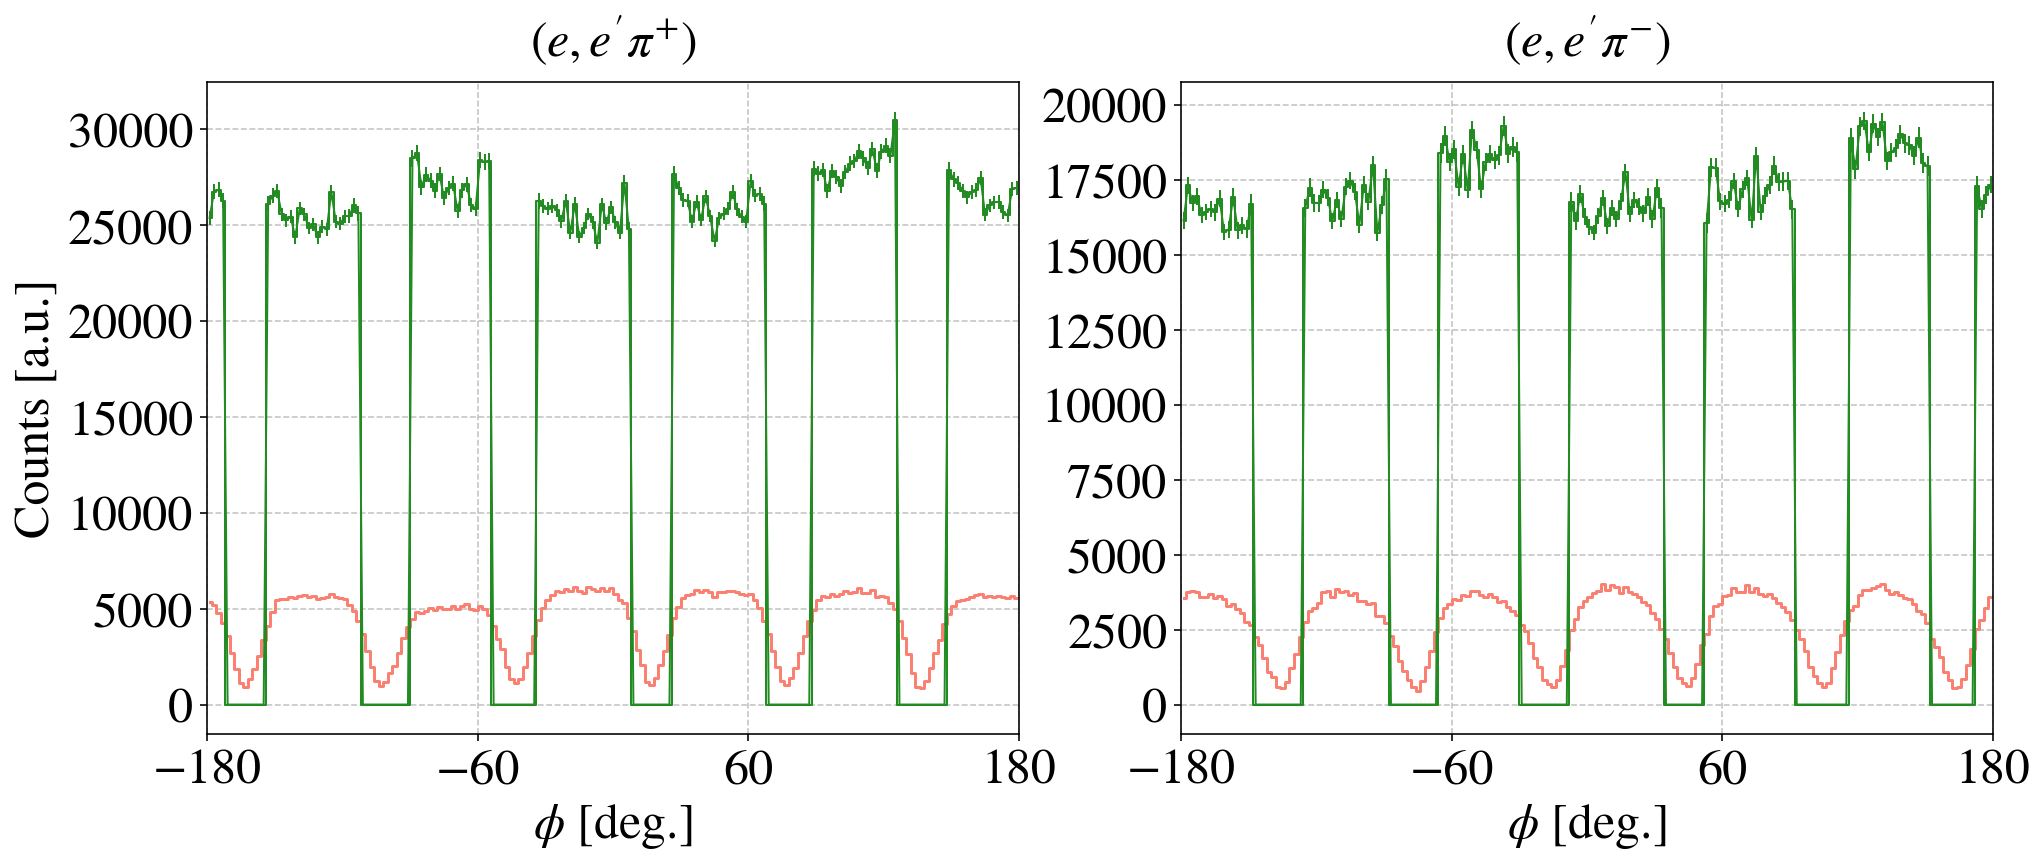

In [22]:
fig = plt.figure(figsize=(16,6));
    
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)

    df  = e_e_pi_pass_cuts[pi_ch];
    df = df[df.runnum==6421]
    phi = np.array(df.pi_Phi)*r2d
    
    # first plot - data from run 6421 with no acceptance correction
    x,histo,x_err,histo_err = plot_step_hist( x_arr=phi,  bins=phi_bins , label='Data: run 6421', 
                                               color='salmon',                    
                                               do_plot_errorbar=False, density=False, linewidth=3)
    h['data-6421']     = histo
    h_err['data-6421'] = histo_err


    # second plot - data from run 6421 with acceptance correction computed from run 6420
    h['data-6421 corrected']     = h['data-6421'] * AccCorrec[pi_ch];
    h_err['data-6421 corrected'] = h_err['data-6421'] * AccCorrec[pi_ch];
    plt.step( phi_centers, h['data-6421 corrected'] , where='mid',
             color='forestgreen', linewidth=1)

    plt.errorbar( phi_centers, h['data-6421 corrected'] , h_err['data-6421 corrected'],
                 color='forestgreen', linewidth=1)




    # cosmetics
    set_axes(ax, '$\phi$ [deg.]', 'Counts [a.u.]' if pi_idx==1 else '',
                 title="$(e,e'"+pi_label+')$',
                 do_add_grid=True,
                 remove_ticks_y=False,
                 do_add_legend=False if pi_idx==2 else False,
                 xlim=phi_xlim,
                 xticks=phi_xticks)   



### Data from other runs

In [23]:
load_SIDIS_data( Nruns = 4 )
e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts = apply_further_selection_cuts_to_data(fdebug=2)

Run number  6420 (1/4 runs)
Loaded 644481 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 274142 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Run number  6421 (2/4 runs)
Loaded 632087 (e,e piplus ) events and  35 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 272140 (e,e piminus ) events and  12 (e,e piminus n), events
retained 9 (e,e piminus n), events with Pn > 275 MeV/c
Run number  6422 (3/4 runs)
Loaded 601973 (e,e piplus ) events and  57 (e,e piplus n), events
retained 46 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 257778 (e,e piminus ) events and  15 (e,e piminus n), events
retained 10 (e,e piminus n), events with Pn > 275 MeV/c
Run number  6426 (4/4 runs)
Loaded 534955 (e,e piplus ) events and  27 (e,e piplus n), events
retained 17 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 229279 (e,e piminus ) events

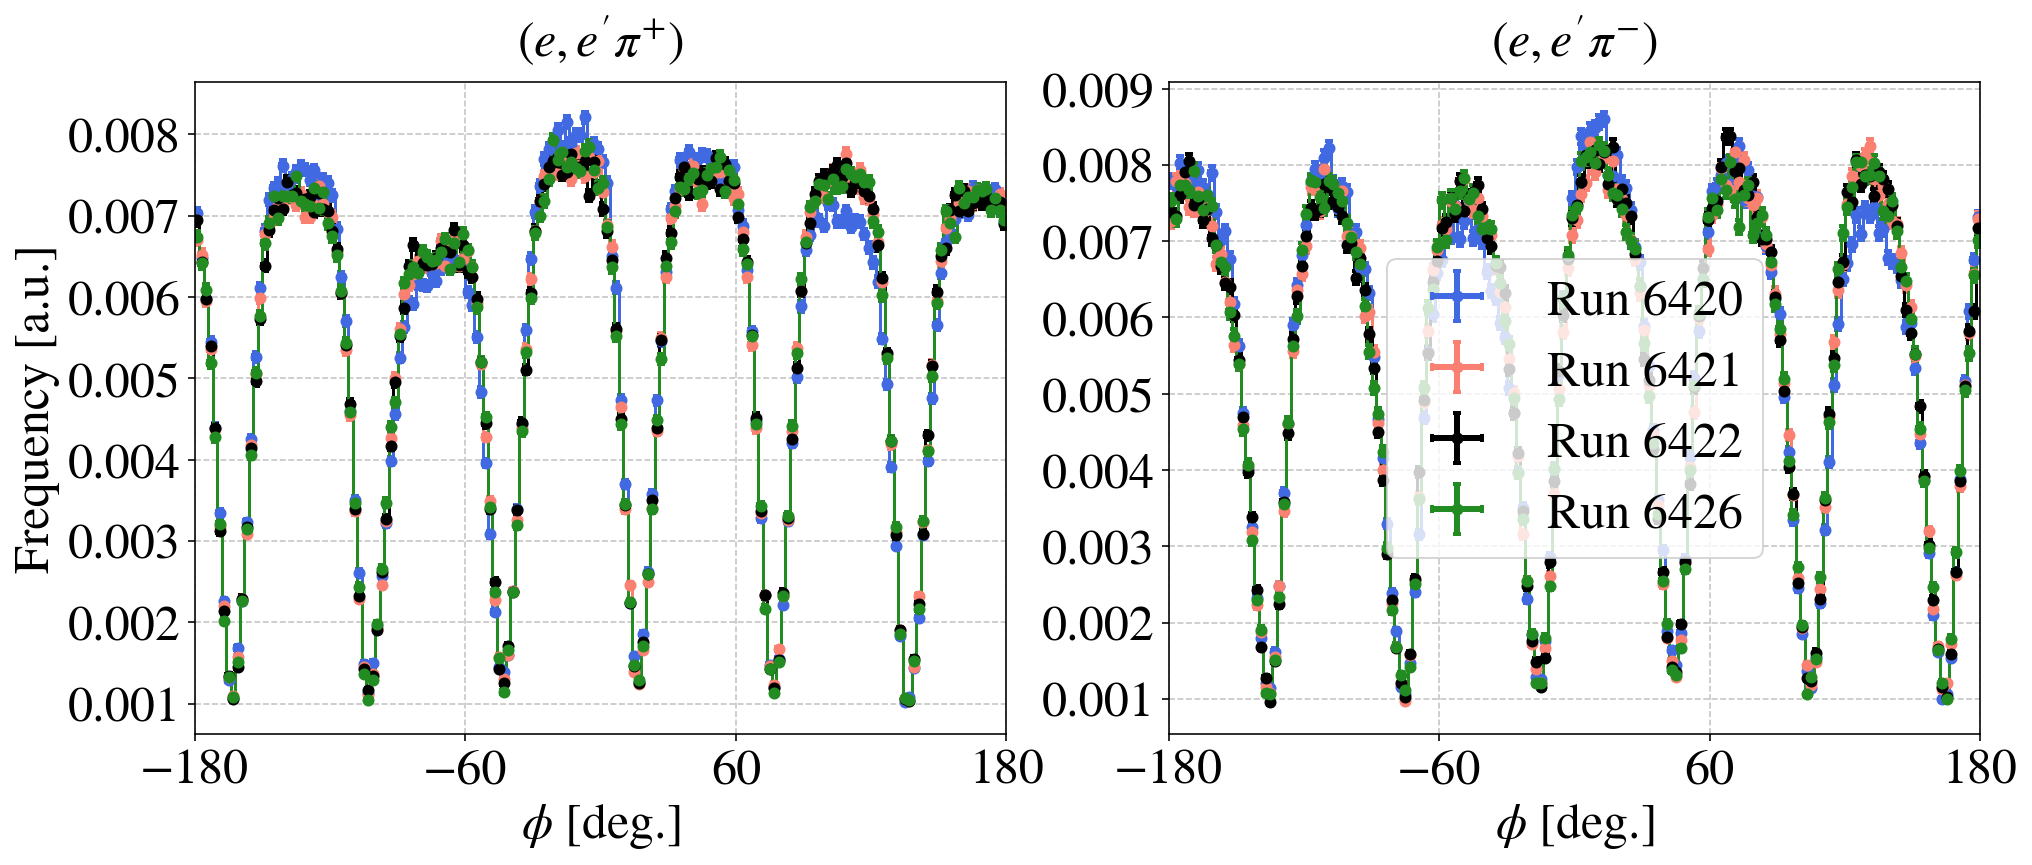

In [27]:
fig = plt.figure(figsize=(16,6));
    
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)
    
    df  = e_e_pi_pass_cuts[pi_ch];
    for run,color in zip([6420,6421,6422,6426],['royalblue','salmon','k','forestgreen']):
        df_run = df[df.runnum==run]
        phi_run = np.array(df_run.pi_Phi)*r2d    
        plot_step_hist( x_arr=phi_run,  bins=phi_bins , label='Run %d'%run, 
                        color=color,
                        do_plot_errorbar=True, density=True, linewidth=3)
    
    # cosmetics
    set_axes(ax, '$\phi$ [deg.]', 'Frequency [a.u.]' if pi_idx==1 else '',
                 title="$(e,e'"+pi_label+')$',
                 do_add_grid=True,
                 remove_ticks_y=False,
                 do_add_legend=True if pi_idx==2 else False,
                 xlim=phi_xlim,
                 xticks=phi_xticks)   

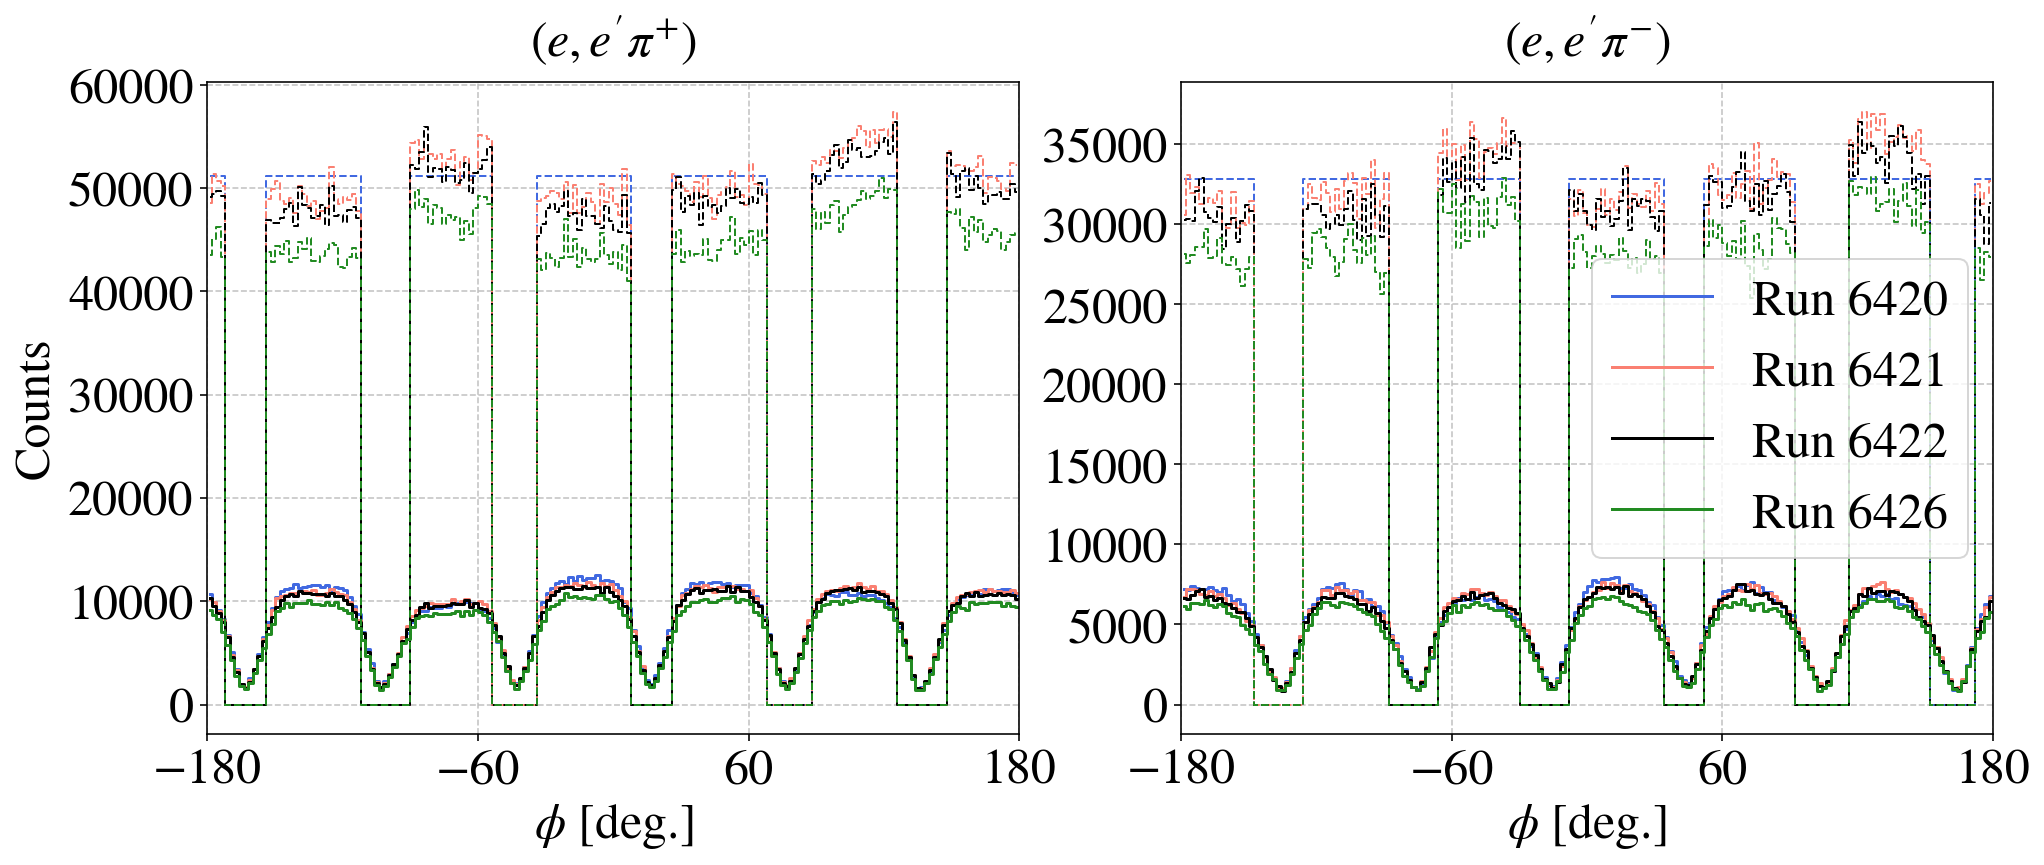

In [26]:
fig = plt.figure(figsize=(16,6));
    
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    ax = fig.add_subplot(1,2,pi_idx)

    df  = e_e_pi_pass_cuts[pi_ch];
    for run,color in zip([6420,6421,6422,6426],['royalblue','salmon','k','forestgreen']):
        df_run = df[df.runnum==run]
        phi_run = np.array(df_run.pi_Phi)*r2d   
        
        # first plot - data with no acceptance correction
        x,histo,x_err,histo_err = plot_step_hist( x_arr=phi_run,  bins=phi_bins , label='Run %d'%run, 
                                                   color=color,                    
                                                   do_plot_errorbar=False, density=False, linewidth=3)
        h['data-%d'%run]     = histo
        h_err['data-%d'%run] = histo_err
        # second plot - data from run 6421 with acceptance correction computed from run 6420
        h['data-%d corrected'%run]     = h['data-%d'%run] * AccCorrec[pi_ch];
        h_err['data-%d corrected'%run] = h_err['data-%d'%run] * AccCorrec[pi_ch];
        plt.step( phi_centers, h['data-%d corrected'%run] , '--', where='mid',
                 color=color, linewidth=1)

        # plt.errorbar( phi_centers, h['data-%d corrected'] , h_err['data-6421 corrected'],
        #              color='forestgreen', linewidth=1)


    # cosmetics
    set_axes(ax, '$\phi$ [deg.]', 'Counts' if pi_idx==1 else '',
                 title="$(e,e'"+pi_label+')$',
                 do_add_grid=True,
                 remove_ticks_y=False,
                 do_add_legend=True if pi_idx==2 else False,
                 xlim=phi_xlim,
                 xticks=phi_xticks)   

# (4) Now check what happens to the (SIDIS) untagged cross-section ratio

In [37]:
var = 'M_X'
df = e_e_pi_pass_cuts['piplus']
print(np.min(df[var]),np.max(df[var]))
print(np.min(df.pi_Theta*r2d),np.max(df.pi_Theta*r2d))

2.500007 4.734063
5.001348593696957 34.998897732448285


In [56]:

# ------------------------------------------------------------------------------------------------ #
def Compute_acceptance_correction_weight( pi_charge_name, phi ):#{
    phi_bin = Find_phi_bin( phi )
    acceptance_correction_weight     = AccCorrec[pi_charge_name][phi_bin]
    acceptance_correction_weight_err = AccCorrec_err[pi_charge_name][phi_bin]
    # areaCoverageCorrection           = 1./TightFiducialPhiAreaFraction[pi_charge_name]
    # acceptance_correction_weight     = AccCorrecTightFiducial[pi_charge_name][phi_bin]    
    # acceptance_correction_weight_err = AccCorrecTightFiducial_err[pi_charge_name][phi_bin]
    return acceptance_correction_weight
#}
# ------------------------------------------------------------------------------------------------ #




In [57]:

# ------------------------------------------------------------------------------------------------ #
def compute_ratio_pips_to_pims(df_dict, 
                               var='xB', bins=np.linspace(0,1,10), 
                               weight_option = 'Acc. correction as f(phi)',
                               z_min=0, z_max=1):#{
    '''
    last edit Apr-28, 2022
    '''
    # z_min,z_max are z limits on the pion outgoing momentum
    df_pips = df_dict['piplus']
    df_pims = df_dict['piminus']
    
    # cut on z
    df_pips = df_pips[ (z_min < df_pips.Zpi) & (df_pips.Zpi < z_max) ]    
    df_pims = df_pims[ (z_min < df_pims.Zpi) & (df_pims.Zpi < z_max) ]

    pips = df_pips[var]
    pims = df_pims[var]
    if weight_option == 'Acc. correction as f(phi)':#{
        phi_pips = np.array( df_pips.pi_Phi )*r2d
        phi_pims = np.array( df_pims.pi_Phi )*r2d
    #}
        
    R_pips_to_pims, R_pips_to_pims_err = [],[]
    for x_min,x_max in zip(bins[:-1],bins[1:]):#{
        

        if weight_option == 'Acc. correction as f(phi)':#{
            # each event is weighted by the acceptance correction weight
            
            phi_pips_in_bin = phi_pips[ (x_min < pips) & (pips < x_max) ]
            W_pips_in_bin   = [ Compute_acceptance_correction_weight( 'piplus' , phi ) for phi in phi_pips_in_bin ]
            Npips_in_bin    = np.sum( W_pips_in_bin )
            
            phi_pims_in_bin = phi_pims[ (x_min < pims) & (pims < x_max) ]
            W_pims_in_bin   = [ Compute_acceptance_correction_weight( 'piminus', phi ) for phi in phi_pims_in_bin ]
            Npims_in_bin    = np.sum( W_pims_in_bin )
            
        else: 
            # no weight, no acceptance corrcetion            
            
            pips_in_bin  = pips[ (x_min < pips) & (pips < x_max) ]
            Npips_in_bin = len(pips_in_bin)
            pims_in_bin  = pims[ (x_min < pims) & (pims < x_max) ]
            Npims_in_bin = len(pims_in_bin)    
            
        #}

        R     = Npips_in_bin / np.max([Npims_in_bin,1])
        R_err = R * np.sqrt( 1./np.max([1,Npips_in_bin]) + 1./np.max([1,Npims_in_bin]) )


        R_pips_to_pims    .append(R)
        R_pips_to_pims_err.append(R_err)
    #}    
    R_pips_to_pims_errup,R_pips_to_pims_errdw = get_err_up_dw(R_pips_to_pims, R_pips_to_pims_err)
    
    return np.array(R_pips_to_pims),np.array(R_pips_to_pims_errup),np.array(R_pips_to_pims_errdw)
#}
# ------------------------------------------------------------------------------------------------ #


In [58]:
z_bins          = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
z_width         = 0.01
var_e_e_pi      = 'xB'
xlabel_e_e_pi   = "Bjorken $x$"
x_bins          = np.linspace(0.2,0.6,10)
x_centers       = (x_bins[1:] + x_bins[:-1])/2
x_width         = (x_bins[1:] - x_bins[:-1])/2
fontsize        = 18

In [62]:
Rpips2pims, Rpips2pims_errup, Rpips2pims_errdw = dict(), dict(), dict()
for z_bin in z_bins:
    z_min,z_max = z_bin-z_width,z_bin+z_width
    weight_option = 'No Acc. correction'
    label = '%.1f %s'%(z_bin, weight_option)
    (Rpips2pims[label], 
     Rpips2pims_errup[label], 
     Rpips2pims_errdw[label]) = compute_ratio_pips_to_pims(df_dict=e_e_pi_pass_cuts ,                                                                            
                                                           var=var_e_e_pi, 
                                                           bins=x_bins,                                                            
                                                           z_min=z_min,z_max=z_max,
                                                           weight_option = weight_option)
    print('done z bin ',z_bin, 'with no acceptance correction');
    
    weight_option = 'Acc. correction as f(phi)'
    label = '%.1f %s'%(z_bin, weight_option)
    (Rpips2pims[label], 
     Rpips2pims_errup[label], 
     Rpips2pims_errdw[label]) = compute_ratio_pips_to_pims(df_dict=e_e_pi_pass_cuts ,                                                                            
                                                           var=var_e_e_pi, 
                                                           bins=x_bins,                                                            
                                                           z_min=z_min,z_max=z_max,
                                                           weight_option = weight_option)

    print('done z bin ',z_bin, 'with acceptance correction');
    # print(z_bin,Rpips2pims[z_bin],Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
print('done') 

done z bin  0.3 with no acceptance correction
done z bin  0.3 with acceptance correction
done z bin  0.4 with no acceptance correction
done z bin  0.4 with acceptance correction
done z bin  0.5 with no acceptance correction
done z bin  0.5 with acceptance correction
done z bin  0.6 with no acceptance correction
done z bin  0.6 with acceptance correction
done z bin  0.7 with no acceptance correction
done z bin  0.7 with acceptance correction
done z bin  0.8 with no acceptance correction
done z bin  0.8 with acceptance correction
done z bin  0.9 with no acceptance correction
done z bin  0.9 with acceptance correction
done


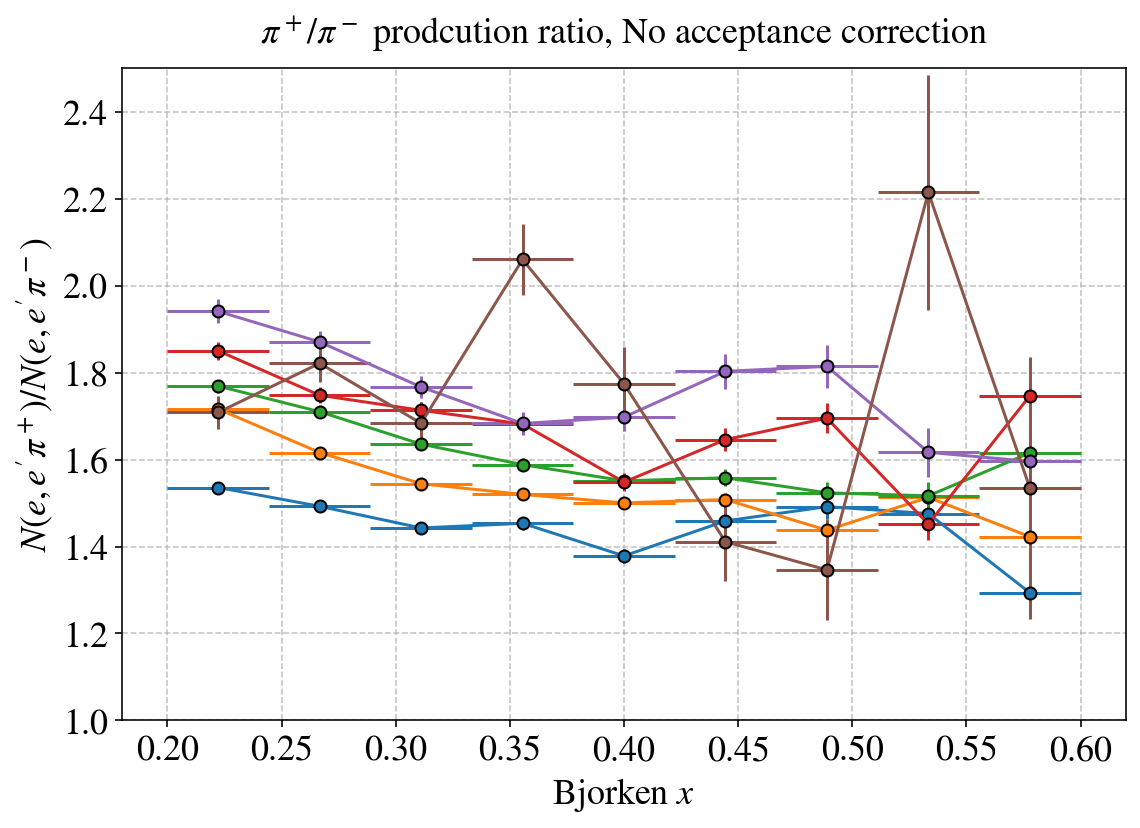

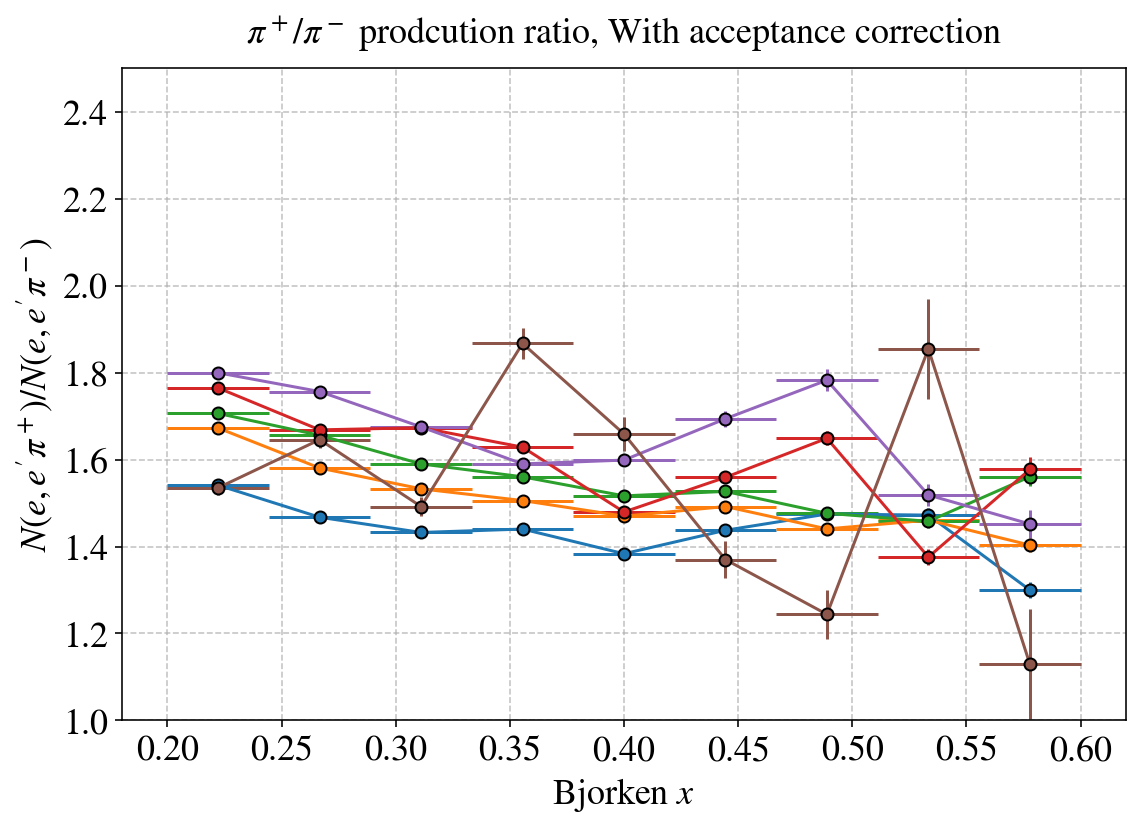

In [66]:
for weight_option,weight_label in zip(['No Acc. correction','Acc. correction as f(phi)'],
                                      ['No acceptance correction','With acceptance correction']):
    
    fig = plt.figure(figsize=(9,6))
    ax  = fig.add_subplot(1,1,1)
    for z_bin in z_bins:
        label = '%.1f %s'%(z_bin, weight_option)
        ax.errorbar(x=x_centers, xerr=x_width, 
                    y=Rpips2pims[label], yerr=(Rpips2pims_errup[label],Rpips2pims_errdw[label]),
                    marker='o',markeredgecolor='k',
                    label='$z=%.2f\pm%.2f$'%(z_bin,z_width))

    set_axes(ax,xlabel_e_e_pi,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",
             title="$\pi^+/\pi^-$ prodcution ratio, "+weight_label,
             do_add_grid=True, do_add_legend=False, 
             fontsize=fontsize,
             ylim=(1,2.5));

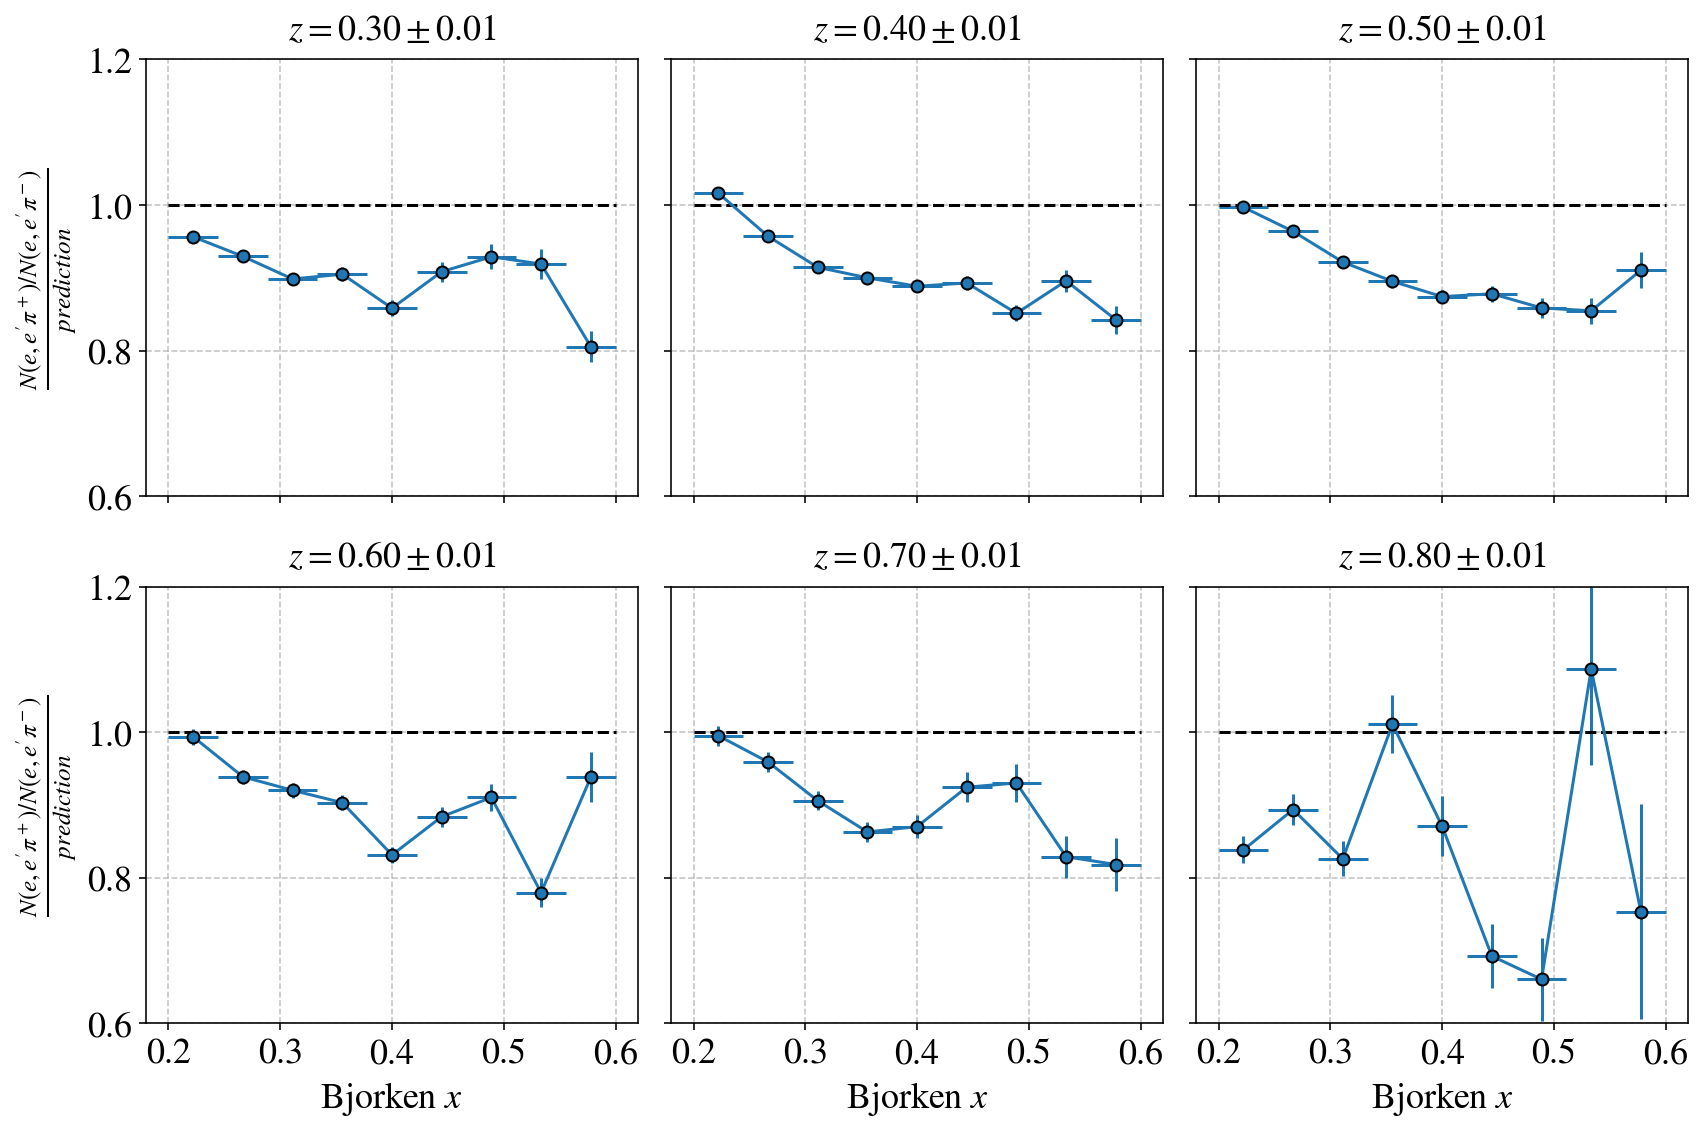

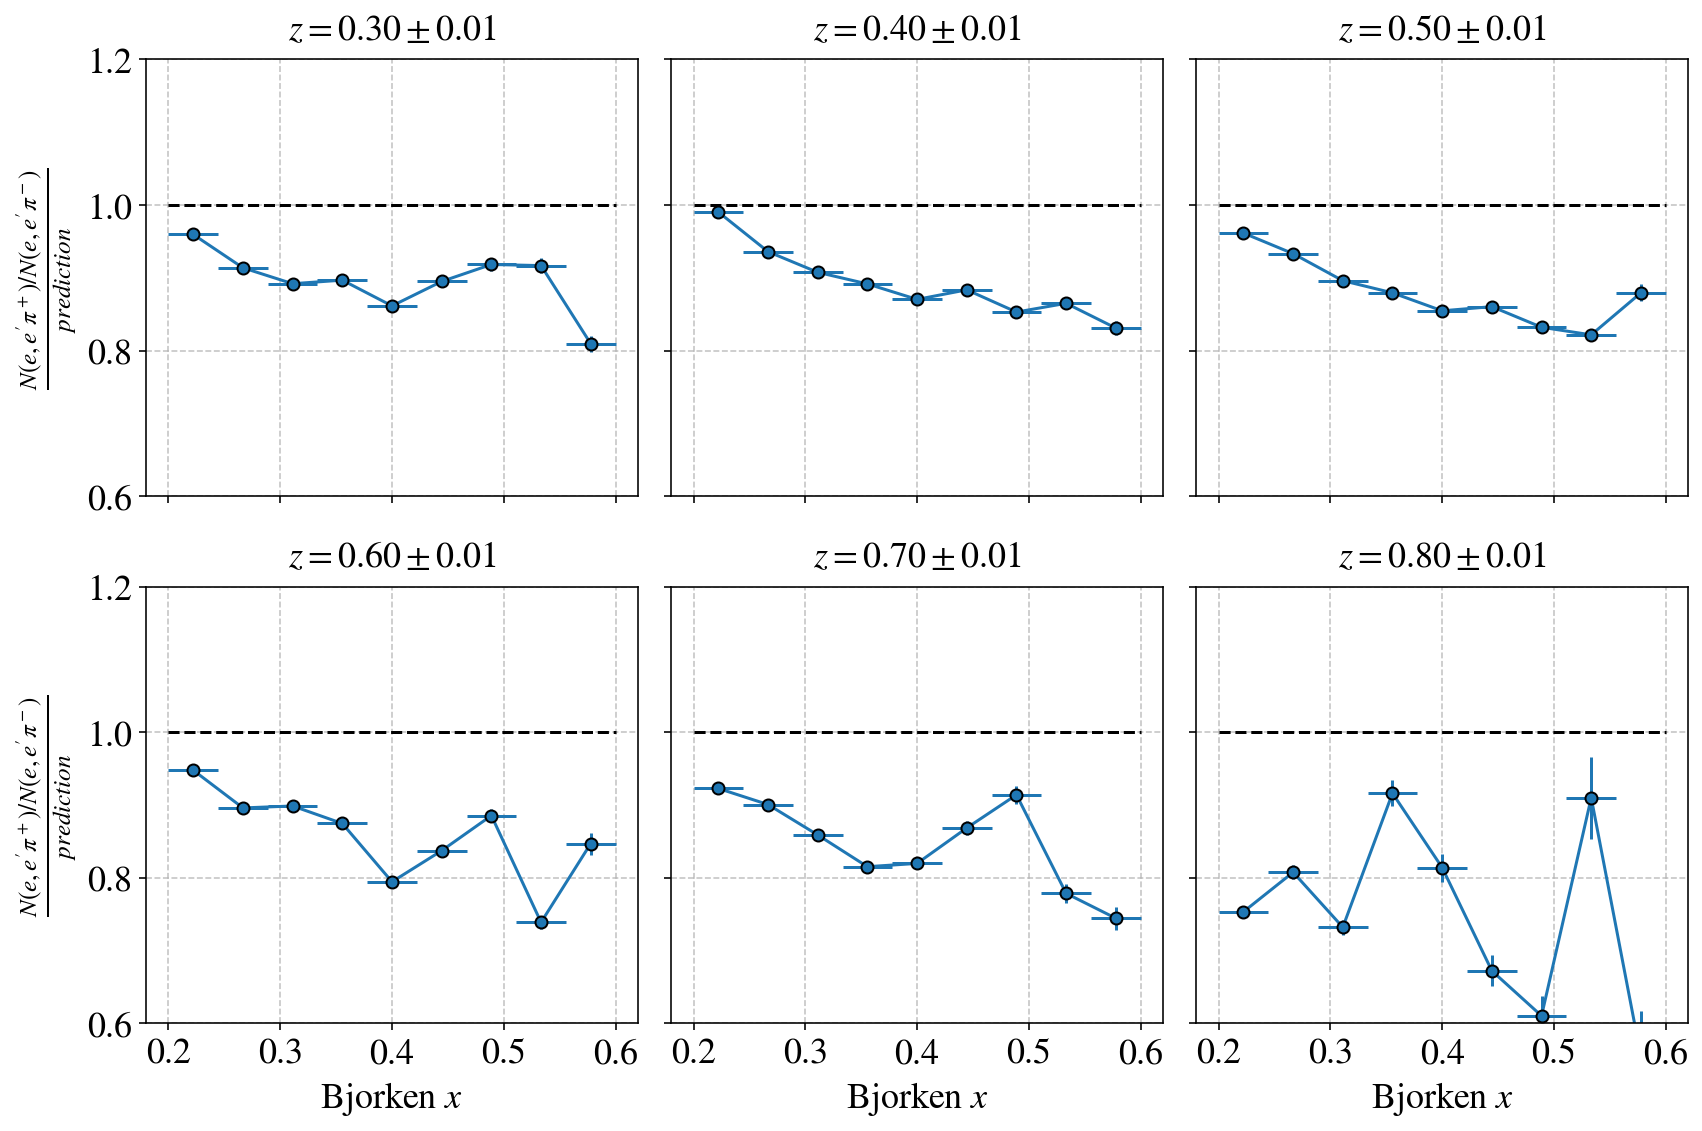

In [70]:
for weight_option,weight_label in zip(['No Acc. correction','Acc. correction as f(phi)'],
                                      ['No acceptance correction','With acceptance correction']):


    fig = plt.figure(figsize=(12,8))
    for z_bin,subplot_idx in zip(z_bins[0:6],range(1,7)):
        label = '%.1f %s'%(z_bin, weight_option)
        ax = fig.add_subplot(2,3,subplot_idx)

        z = z_bin
        R_SIDIS = (4.58 + 0.16*z*z - 0.51*z)/(3.32 + 0.64*z*z - 2.04*z)
        ax.errorbar(x=x_centers, xerr=x_width, 
                    y = Rpips2pims[label]/R_SIDIS, 
                    yerr= (Rpips2pims_errup[label]/R_SIDIS, Rpips2pims_errdw[label]/R_SIDIS),
                    marker='o',markeredgecolor='k',
                    label='$z=%.2f\pm%.2f$'%(z_bin,z_width))
        ax.plot([0.2,0.6],[1,1],'--k')
        set_axes(ax,
                 x_label=xlabel_e_e_pi if subplot_idx>3 else '',
                 y_label="$\\frac{N(e,e'\pi^+)/N(e,e'\pi^-)}{prediction}$" if subplot_idx%3==1 else '',
                 remove_ticks_x=False if subplot_idx>3 else True,
                 remove_ticks_y=False if subplot_idx%3==1 else True,
                 title="$z=%.2f\pm%.2f$"%(z_bin,z_width),
                 do_add_grid=True, do_add_legend=False, fontsize=fontsize,
                 ylim=(0.6,1.2),yticks=(0.6,0.8,1,1.2));

    plt.tight_layout()